In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("/content/train.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_df = pd.read_csv("/content/test.csv")
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
train_df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [6]:
train_df['Title'] = train_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
title_mean_age = train_df.groupby('Title')['Age'].mean()
train_df['Age'] = train_df.apply(
    lambda row: title_mean_age[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1
)

In [7]:
train_df['Age'].isna().sum()

0

In [8]:
train_df = train_df.drop(['Cabin'], axis=1)

In [9]:
train_df['Embarked'] = train_df['Embarked'].fillna(train_df['Embarked'].mode()[0])

In [10]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [11]:
test_df.isna().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [12]:
test_df['Title'] = test_df['Name'].str.extract('([A-Za-z]+)\.', expand=False)
title_mean_age = train_df.groupby('Title')['Age'].mean()
test_df['Age'] = test_df.apply(
    lambda row: title_mean_age[row['Title']] if pd.isna(row['Age']) else row['Age'], axis=1
)

In [13]:
train_df['Age'].isna().sum()

0

In [14]:
test_df = test_df.drop(['Cabin'], axis=1)

In [15]:
train_df['Sex'] = train_df['Sex'].map({'male':0, 'female': 1})
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female': 1})

In [16]:
train_df = pd.get_dummies(train_df, columns=['Embarked'], drop_first=True)
test_df = pd.get_dummies(test_df, columns=['Embarked'], drop_first=True)

In [17]:
X = train_df.drop(['Survived', 'Name', 'Ticket','Title'], axis=1)
y = train_df['Survived']

test_df = test_df.drop(['Name', 'Ticket','Title'], axis=1)
X_test = test_df

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


**AdaBoost**

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report


model_ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=2),
                               n_estimators=50,
                               random_state=42)


model_ada.fit(X_train, y_train)


y_pred_ada = model_ada.predict(X_val)


accuracy_ada = accuracy_score(y_val, y_pred_ada)
print(f"AdaBoost Accuracy: {accuracy_ada:.4f}")
print("AdaBoost:\n", classification_report(y_val, y_pred_ada))


AdaBoost Accuracy: 0.8212
AdaBoost:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



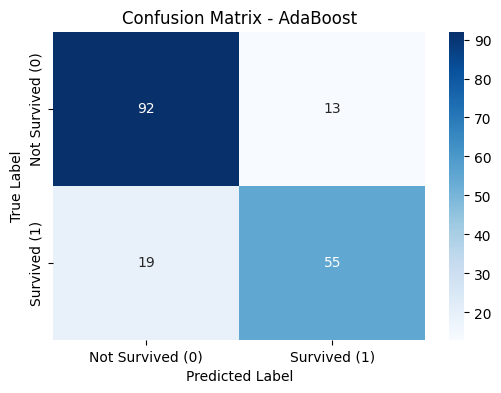

In [27]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm_ada = confusion_matrix(y_val, y_pred_ada)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived (0)', 'Survived (1)'], yticklabels=['Not Survived (0)', 'Survived (1)'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - AdaBoost")
plt.show()

**GradientBoost**

In [29]:
from sklearn.ensemble import GradientBoostingClassifier


model_gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [30]:
y_pred_gb = model_gb.predict(X_val)


accuracy_gb = accuracy_score(y_val, y_pred_gb)
print(f"Gradient Boosting Accuracy: {accuracy_gb:.4f}")
print("Gradient Boosting:\n", classification_report(y_val, y_pred_gb))

Gradient Boosting Accuracy: 0.8324
Gradient Boosting:
               precision    recall  f1-score   support

           0       0.84      0.89      0.86       105
           1       0.82      0.76      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



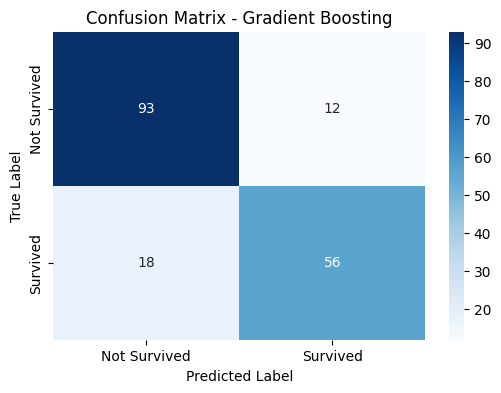

In [31]:
cm_gb = confusion_matrix(y_val, y_pred_gb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Gradient Boosting")
plt.show()


**XG Boost**

In [32]:
from xgboost import XGBClassifier


model_xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [21:31:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [33]:

y_pred_xgb = model_xgb.predict(X_val)


accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb:.4f}")
print("XGBoost:\n", classification_report(y_val, y_pred_xgb))

XGBoost Accuracy: 0.8101
XGBoost:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



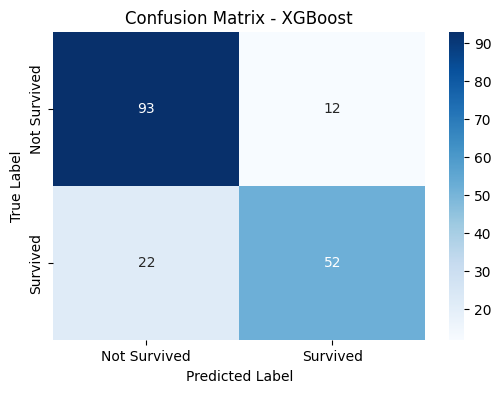

In [34]:
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - XGBoost")
plt.show()

In [36]:
from lightgbm import LGBMClassifier


model_lgb = LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
model_lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000179 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 436
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=3, random_state=42)

In [38]:
y_pred_lgb = model_lgb.predict(X_val)

accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print(f"LightGBM Accuracy: {accuracy_lgb:.4f}")
print("LightGBM:\n", classification_report(y_val, y_pred_lgb))

LightGBM Accuracy: 0.8212
LightGBM:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



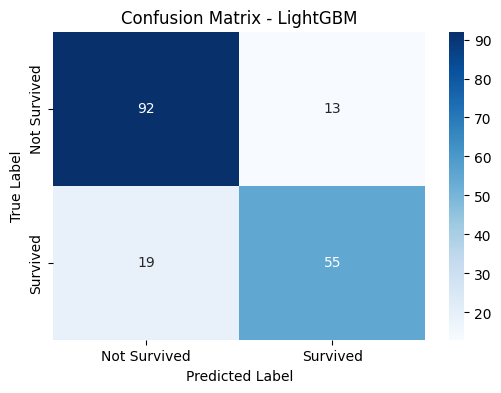

In [39]:

cm_lgb = confusion_matrix(y_val, y_pred_lgb)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - LightGBM")
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize StandardScaler
scaler = StandardScaler()

# Scale training and validation data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)


**Logistic Regression**

Logistic Regression Accuracy: 0.8101
Logistic Regression:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



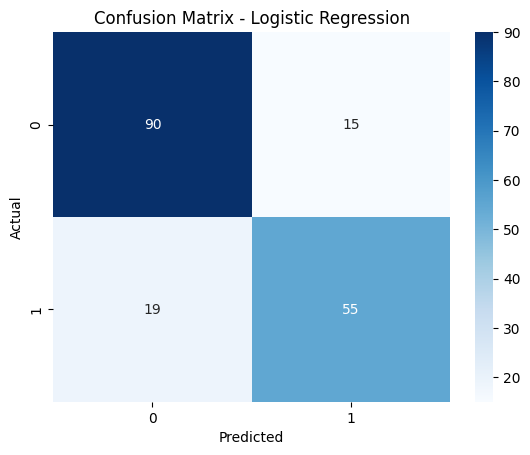

In [58]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_scaled, y_train)

# Predict
y_pred_lr = model_lr.predict(X_val_scaled)

# Evaluate
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print("Logistic Regression:\n", classification_report(y_val, y_pred_lr))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


**SVC**

SVM Accuracy: 0.8156
SVM:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.80       179
weighted avg       0.82      0.82      0.81       179



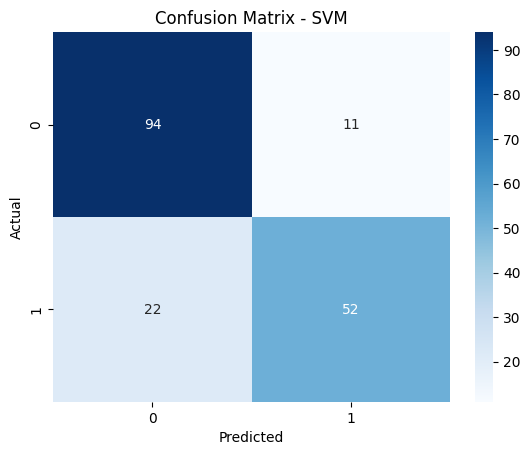

In [59]:
from sklearn.svm import SVC

# Train SVM
model_svm = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
model_svm.fit(X_train_scaled, y_train)

# Predict
y_pred_svm = model_svm.predict(X_val_scaled)

# Evaluate
accuracy_svm = accuracy_score(y_val, y_pred_svm)
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print("SVM:\n", classification_report(y_val, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred_svm)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


**KNN**

In [63]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

KNN Accuracy: 0.7933
KNN:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       105
           1       0.78      0.70      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



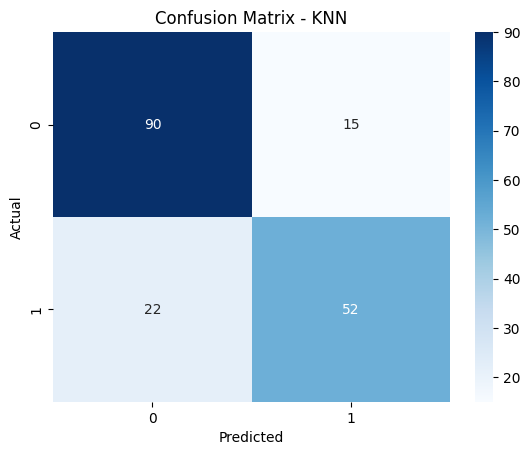

In [64]:
y_pred_knn = model_knn.predict(X_val_scaled)


accuracy_knn = accuracy_score(y_val, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.4f}")
print("KNN:\n", classification_report(y_val, y_pred_knn))


cm = confusion_matrix(y_val, y_pred_knn)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - KNN')
plt.show()

**DT**

In [65]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=5, random_state=42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision Tree Accuracy: 0.7933
Decision Tree:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       105
           1       0.79      0.68      0.73        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



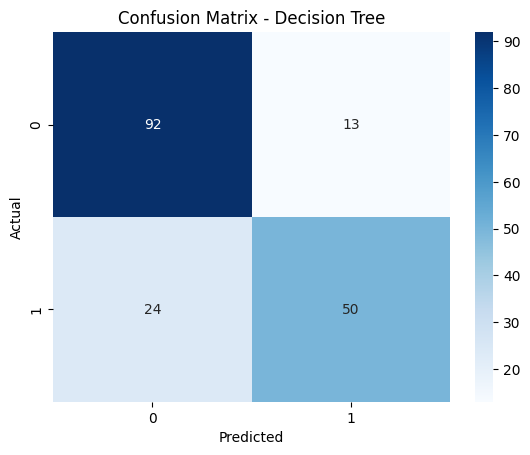

In [66]:
y_pred_dt = model_dt.predict(X_val)


accuracy_dt = accuracy_score(y_val, y_pred_dt)
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print("Decision Tree:\n", classification_report(y_val, y_pred_dt))


cm = confusion_matrix(y_val, y_pred_dt)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()

**Random Forest**

In [67]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
model_rf.fit(X_train, y_train)  # No scaling needed

RandomForestClassifier(max_depth=5, random_state=42)

Random Forest Accuracy: 0.8101
Random Forest:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85       105
           1       0.81      0.70      0.75        74

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.81      0.81       179



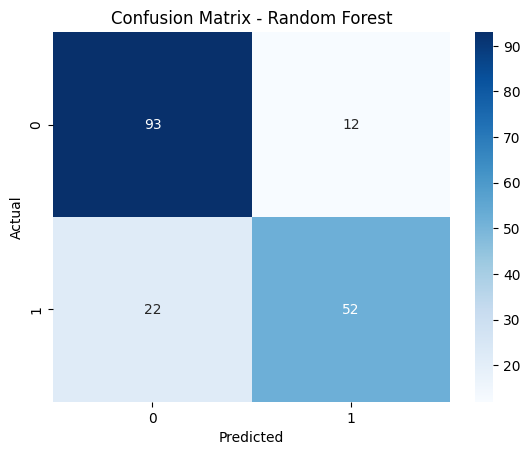

In [68]:
y_pred_rf = model_rf.predict(X_val)


accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")
print("Random Forest:\n", classification_report(y_val, y_pred_rf))


cm = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

<ipython-input-69-85e8682efd62>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_pred_gb, palette='Set2')


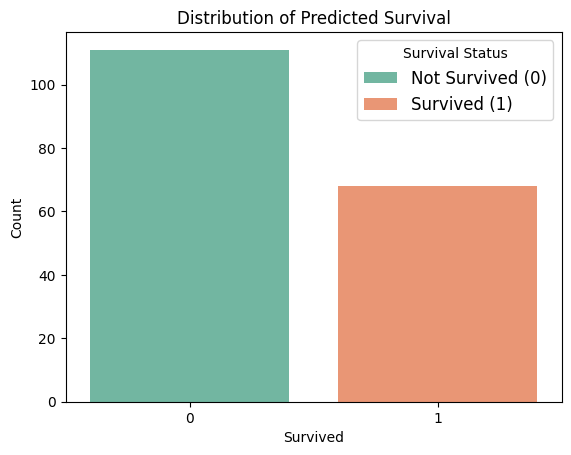

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of predicted survival values
sns.countplot(x=y_pred_gb, palette='Set2')
plt.title('Distribution of Predicted Survival')
plt.legend(title='Survival Status', labels=['Not Survived (0)', 'Survived (1)'], fontsize=12)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

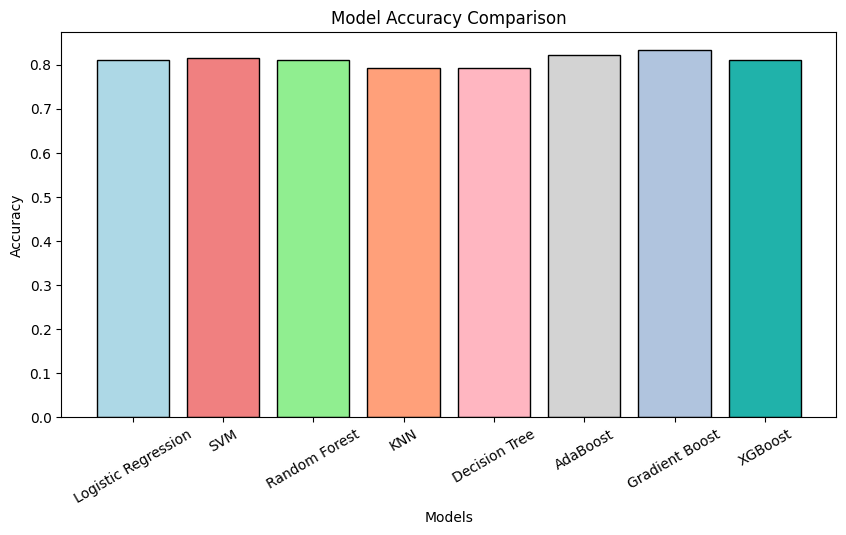

In [75]:
import matplotlib.pyplot as plt


models = ["Logistic Regression", "SVM", "Random Forest", "KNN", "Decision Tree", "AdaBoost", "Gradient Boost", "XGBoost"]
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_knn, accuracy_dt, accuracy_ada, accuracy_gb, accuracy_xgb]


colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightsalmon', 'lightpink', 'lightgray', 'lightsteelblue', 'lightseagreen']

plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color=colors, edgecolor='black')


plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)


plt.show()
